In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
x_train[0].shape


(28, 28)

# 28 by 28 images 

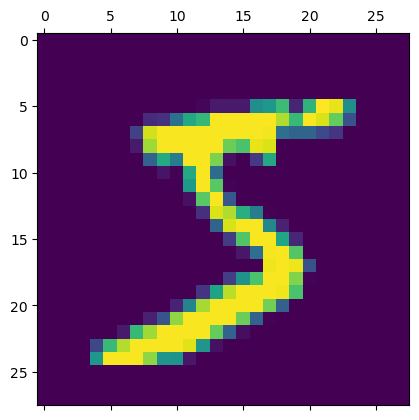

In [5]:
plt.matshow(x_train[0])

In [6]:
y_train[0]

5

# We need to reshape it from 2d array to 1d array

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_trainflattened=x_train.reshape(len(x_train),28*28)


In [9]:
x_testflattened=x_test.reshape(len(x_test),28*28)

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_trainflattened)

# You can also transform the test data using the same scaler
x_test_scaled = scaler.transform(x_testflattened)


In [32]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
      keras.layers.Dense(10,activation='sigmoid'),
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2526 - accuracy: 0.8648
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2314 - accuracy: 0.9349
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1703 - accuracy: 0.9510
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1429 - accuracy: 0.9595
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1308 - accuracy: 0.9640
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1132 - accuracy: 0.9680
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1047 - accuracy: 0.9718
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0917 - accuracy: 0.9754
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0885 - accuracy: 0.9770
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.078

In [33]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1521 - accuracy: 0.9652


[0.15213258564472198, 0.9652000069618225]

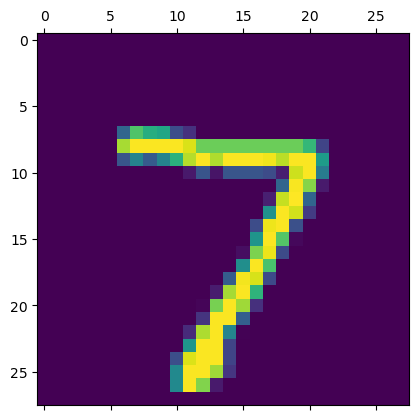

In [34]:
plt.matshow(x_test[0])

In [37]:
y_predicted=model.predict(x_test)


313/313 [==============================] - 0s 1ms/step


In [38]:
np.argmax(y_predicted[0])

7

In [39]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

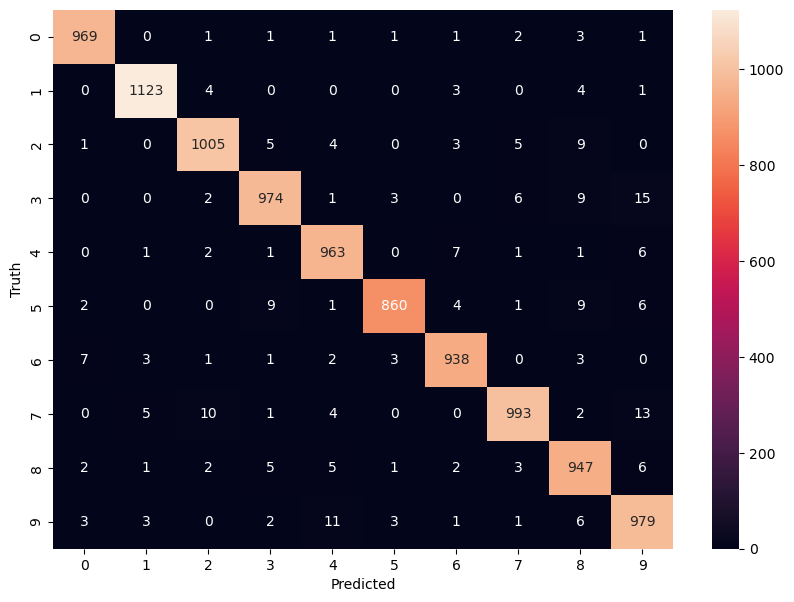

In [19]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
model.save("my_model.h5")